# mglearn 모듈 설치 및 확인

In [7]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install mglearn

  Using cached mglearn-0.1.9.tar.gz (540 kB)
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=f909e9698e6a7e054daa525269ca8b0eb82b3c5cbfb5e0d11d71688c27a92117
  Stored in directory: c:\users\daily\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [12]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
Click==7.0
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
comtypes==1.1.7
conda==4.8.2
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.15
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
docutils==0.16
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
flake8==3.7.9
Flask==1.1.1
fsspec==0.

# KNN 문제풀이

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn
import os;

## 1. 데이터셋 불러오기
pandas 라이브러리의 read_csv

In [8]:
# 1. 데이터셋을 불러온다. (전처리가 필요없는 데이터)
data = pd.read_csv("../../../datasets/internetlogit.csv")
data.sample(10)

,age,gender,webpages,videohours,income,usage
230,32,0,95,3.472222,8644,1
151,25,1,21,15.441944,8252,1
669,40,1,33,2.232222,5152,0
14,45,0,67,13.735000,11755,1
627,33,0,13,0.000000,0,0
854,21,0,26,0.521389,9241,0
154,32,0,21,0.509444,4759,0
426,59,1,30,0.208611,2457,0
926,34,0,32,12.141111,11081,1
212,53,0,22,1.448333,7710,0


## 2. 훈련 데이터와 검증 데이터로 나눈다.
sklearn.modelselection의 train_test_split

In [11]:
# 먼저 피처와 클래스 분리
features = data.loc[:, data.columns != 'usage']   # usage가 아닌 컬럼 모두
target = data.loc[:, data.columns == 'usage']     # usage만 추출

,usage
0,0
1,1
2,0
3,0
4,0
...,...
961,0
962,0
963,0
964,1


In [21]:
# 학습 데이터와 검증 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=66)
# 차원 확인
print(f"X_train: {X_train.shape}, type: {type(X_train)}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
# 클래스 데이터는 1차원으로 변환
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

X_train: (724, 5), type: <class 'pandas.core.frame.DataFrame'>
X_test: (242, 5)
y_train: (724, 1)
y_test: (242, 1)


## 3. 모델을 학습시킨다
최적의 k값을 찾아야 한다.

In [22]:
# KNN 모델 학습시키기
model = KNeighborsClassifier(n_neighbors=5)   # k값은 5
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
# 최초 학습 결과 정확도
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"훈련 데이터: {round(train_acc, 3)}")
print(f"검증 데이터: {round(test_acc, 3)}")

훈련 데이터: 0.888
검증 데이터: 0.88


C:\Users\daily\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daily\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\daily\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daily\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daily\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daily\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51221 missing from cur

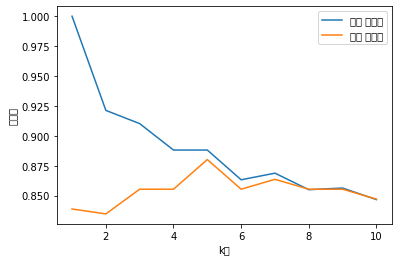

In [27]:
# 최적의 k값을 찾아본다.
train_accs = []
test_accs = []
k_trials = list(range(1, 11))

# k별 정확도 평가하기
for k in k_trials:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_accs.append(model.score(X_train, y_train))
    test_accs.append(model.score(X_test, y_test))

# 꺾은선그래프로 시각화한다.
plt.plot(k_trials, train_accs, label="훈련 정확도")
plt.plot(k_trials, test_accs, label="검증 정확도")
plt.xlabel("k값")
plt.ylabel("정확도")
plt.legend()

plt.show()